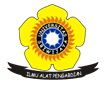

# KECERDASAN BUATAN 
# Nama : Nurulia Mulisari
# Kelas : SK 5 A Indralaya

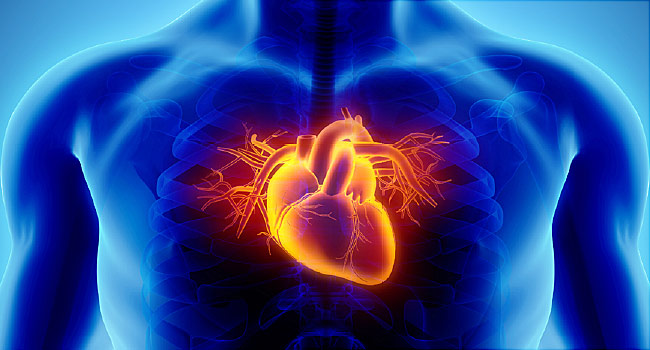

# A. IMPORT MODUL YANG DIPERLUKAN

Modul yang diperlukan ialah :
# 1. numpy dan pandas 
Kedua modul ini sudah standar yang wajib diimport untuk menghandle data.

# 2. matplotlib
Library ini digunakan untuk men-plot hasil akurasi dan loss nanti.

# 3. keras
Pada modul Keras, adapun beberapa fungsi yang dipakai antara lain : 
    - Optimizers Adam
    - Model Sequential
    - Layers Dense
    - Aktivasi Relu
    - utils to_categorical
    
# 4. seaborn
library untuk visualisasi data yang dibangun di atas matplotlib. Seaborn memiliki lebih banyak fungsi untuk visualisasi data dan lebih mudah digunakan. 

# 5. warning
Peringatan disediakan untuk memperingatkan pengembang tentang situasi yang tidak selalu merupakan pengecualian. Biasanya, peringatan terjadi ketika ada beberapa elemen pemrograman tertentu yang sudah usang, seperti kata kunci, fungsi atau kelas, dll.

In [ ]:
#importing the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras import optimizers
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
import pandas as pd 

In [3]:
uploaded = files.upload()

Saving heart.csv to heart.csv


# B. DATASET
Data set yang digunakan ialah Heart Diseases Analysis. Data ini bisa kita dapatkan di github.
Berikut link Dataset Heart Disease Analysis yang digunakan :
https://github.com/iamsuvhro/Heart-Diseases-Analysis

# C. DESKRIPSI DATA
(age): Usia Pasien

(sex): Jenis Kelamin Pasien

(cp): Jenis Nyeri Dada-Faktor

(trestbps): Tekanan Darah

(chol): Kolesterol

(fbs) : Gula darah > 120 mg/dl


1 = true

0 = false

(restecg): Hasil Elektrokardiografi 

Value 0: Normal

Value 1: Mempunyai Kelainan Gelombang ST-T
(inveri gelombang T/elevasi 

depresi ST> 0,05 mV)

Value 2: Menunjukkan Kemungkinan atau Pasti Hipertrofi Ventrikel Kiri Menurut Kriteria Estes

(thalach): Detak Jantung Maksimum Tercapai

(exang): Angina yang Diinduksi oleh Olahraga

1 = yes

0 = no

(oldpeak): Depresi ST yang disebabkan oleh Olahraga yang Relatif Terhadap Istirahat

(slope): Kemiringan Segmen ST

Value 1: Miring Keatas

Value 2: Datar 

Value 3: Landai

(ca): Jumlah Pembuluh Darah Utama yang diwarnai dengan Tepung dikodekan dengan Bilangan Bulat 0-3 yang diwarnai dengan Flourosopy

Nilia 3 = Berarti Normal

Nilai 6 = Berarti Cacat Tetap

Nili 7 = Berarti Cacat yang Dapat Diperbaiki


(num): Diagnosis Penyakit Jantung (Status Penyakit Angiografi)

Value 0: < Penyempitan Diameter 50% 

Value 1: > Penyempitan Diameter 50%

[SUMBER 1] https://rstudio-pubs-static.s3.amazonaws.com/453433_44589360410747f2bccfaef61007df06.html

In [ ]:
#importing the dataset
df=pd.read_csv("heart.csv")

* Kemudian dilanjutkan dengan mengupload data yang akan diolah nantinya.

In [5]:
np.shape(df)

(303, 14)

In [6]:
print (df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


* Output disini akan membuat sebuah tabel yang berisikan data mengenai age, sex, cp, trestbps, chol, fbs, restecg, thalach,
 exang, oldpeak, slope, ca, thal, target.

# D. EXPLORATORY DATA ANALYSIS
Step 1: EDA (Exploratory Data Analysis)

Exploratory Data Analysis (EDA) merupakan salah satu bagian dari proses data science. EDA menjadi sangat penting sebelum melakukan feature engineering dan modeling karena dalam tahap ini kita harus memahami datanya terlebih dahulu.

Proses Data Science meliputi :

* Data Preparation
* Data Cleansing
* Exploratory Data Analysis
* Feature Engineering
* Modeling
* Evaluation
* Deployment

Pada umumnya Exploratory Data Analysis dilakukan dengan beberapa cara:
* Univariat Analysis — analisis deskriptif dengan satu variabel.
* Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.
* Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.

[SUMBER 2] https://medium.com/data-folks-indonesia/memahami-data-dengan-exploratory-data-analysis-a53b230cce84

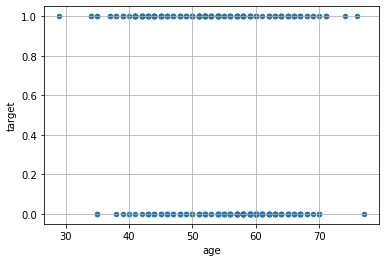

In [7]:
#plotting the dataset using seaborn
df.plot(kind="scatter",x="age",y="target");
#kind type scatter
plt.grid()
#plot.grid will show the grid
plt.show()
#show function will show the plot result

* Maksud dari 'Scatter' berarti diguanakan untuk scatter plots
* Plot Scatter membutuhkan kolom numerik untuk sumbu x dan y. Ini dapat di tentukan dengan kata kunci x dan y masing-masing, yang mana keterangan x ialah age (usia pasien) sedangkan sumbu y nya ialah target.

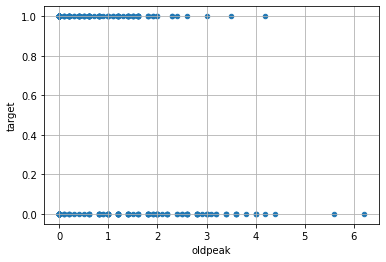

In [8]:
#plotting the dataset using seaborn
df.plot(kind="scatter",x="oldpeak",y="target");
#kind type scatter
plt.grid()
#plot.grid will show the grid
plt.show()
#show function will show the plot result

* Maksud dari 'Scatter' berarti diguanakan untuk scatter plots
* Plot Scatter membutuhkan kolom numerik untuk sumbu x dan y. Ini dapat di tentukan dengan kata kunci x dan y masing-masing, yang mana keterangan x ialah oldpeak (Depresi ST yang disebabkan oleh Olahraga yang Relatif Terhadap Istirahat) sedangkan sumbu y nya ialah target.

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* Maka dari itu sesuai dengan hasil data pada In [6] data yang akan di tampilkan ialah age, sex, cp, trestbps, chol, fbs, restecg, thalach,
 exang, oldpeak, slope, ca, thal, target.

In [10]:
#this is the number who survived and not survived
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

* DataFrame.value_counts(subset = None , normalize = False , sort = True , ascending = False) Kembalikan Seri yang berisi jumlah baris unik di DataFrame.

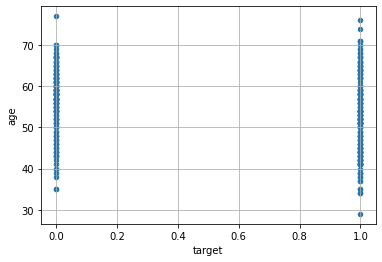

In [11]:
#plotting the dataset using seaborn
df.plot(kind="scatter",x="target",y="age");
#kind type scatter
plt.grid()
#plot.grid will show the grid
plt.show()
#show function will show the plot result

* Maksud dari 'Scatter' berarti diguanakan untuk scatter plots
* Plot Scatter membutuhkan kolom numerik untuk sumbu x dan y. Ini dapat di tentukan dengan kata kunci x dan y masing-masing, yang mana keterangan x ialah target sedangkan sumbu y nya ialah age.

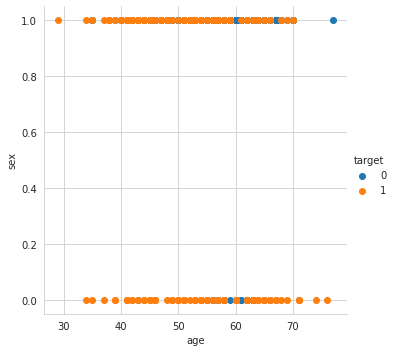

In [12]:
#adding the white grid style 
sns.set_style("whitegrid");
#adding datapoint colour and size
sns.FacetGrid(df, hue="target",size=5)\
        .map(plt.scatter, "age","sex")\
        .add_legend(); #legend fuction will describe class color
plt.show();
    

* sns.set_style : Perintah Mengembalikan dikt parameter atau yang digunakan dalam `with` pernyataan untuk menyetel gaya sementara.
* Keterangan :
* 0 untuk gambar yang berwarna biru.
* 1 untuk gambar yang berwarna orange. 

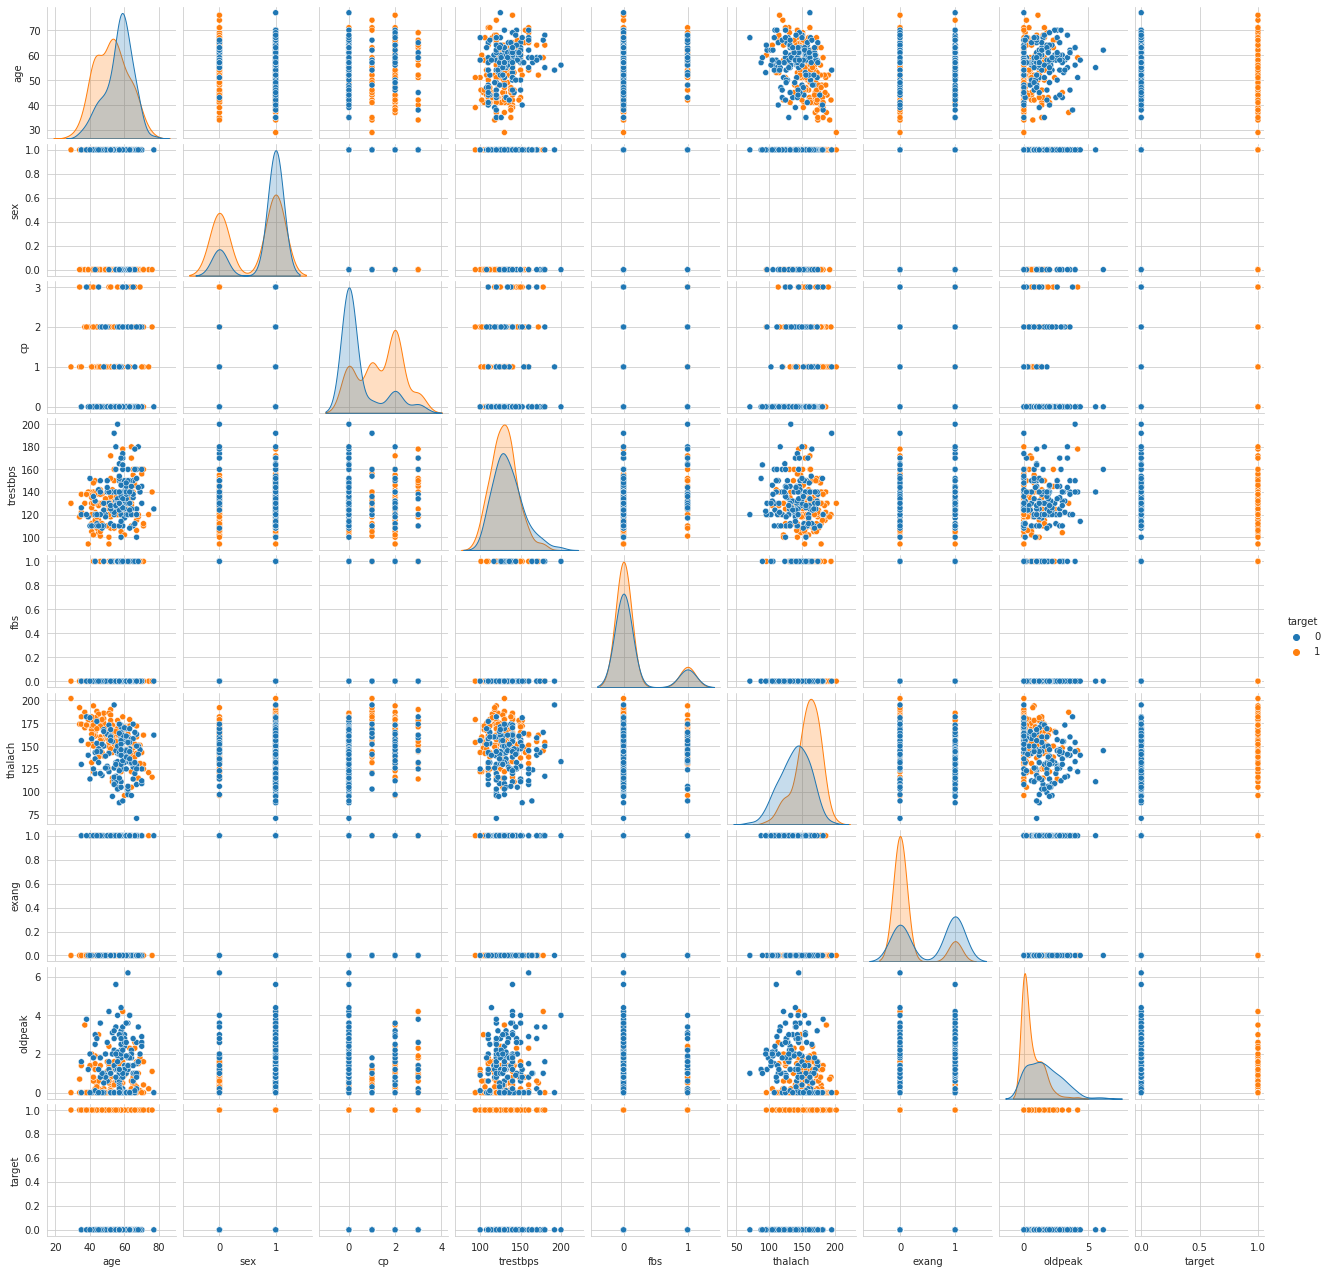

In [13]:
#pairplot on Habeman dataset
plt.close()
sns.pairplot(df,hue="target",vars=['age', 'sex', 'cp', 'trestbps', 'fbs','thalach',
       'exang', 'oldpeak', 'target'],size=2)
plt.show()

* Meskipun plot ini sendiri dapat berguna dalam analisis, kita dapat membuatnya lebih berharga dengan mewarnai gambar berdasarkan variabel kategori, Yang perlu kita lakukan adalah menggunakan huekata kunci dalam sns.pairplotpemanggilan fungsi.

In [14]:
def dens_plot(features,class_var):
    #adding the white grid style 
    sns.set_style(style="whitegrid")
    #adding datapoint colour and size
    sns.FacetGrid(data=df, hue=class_var,size=5)\
        .map(sns.distplot,features)\
        .add_legend()

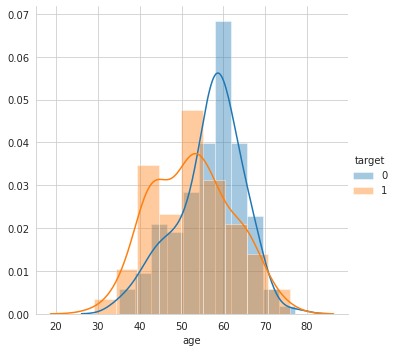

In [15]:
dens_plot("age","target")
plt.show()

* dens adalah fungsi umum yang digunakan untuk memplot kepadatan. Fungsi memanggil tertentu methods yang bergantung pada classargumen pertama. Jadi fungsi plot kepadatan untuk model POT univariat.

# E. OBSERVATIONS

Observations from the above PDFs and CDFs :

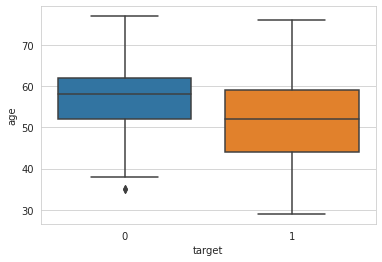

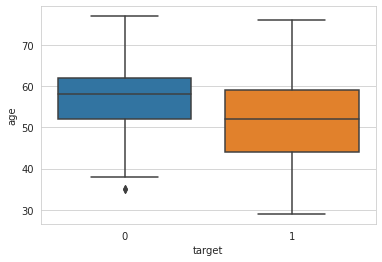

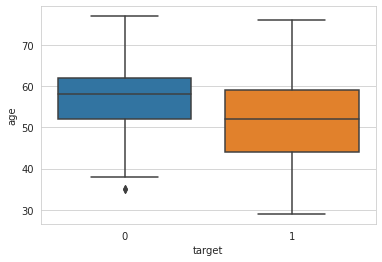

In [16]:
#Box Plot for the feature axillary nodes
sns.boxplot(x = 'target', y ='age', data = df)
plt.show()
#Box Plot for the feature Age
sns.boxplot(x = 'target',y = 'age', data = df)
plt.show()
#Box Plot for the feature Year of Operations
sns.boxplot(x = 'target', y = 'age', data = df)
plt.show()

* `sns.boxplot` : Menunjukkan distribusi data kuantitatif dengan cara yang memfasilitasi perbandingan antar variabel atau antar level variabel kategori. Kotak tersebut menunjukkan kuartil dari kumpulan data sementara kumis diperluas untuk menunjukkan sisa distribusi, kecuali untuk titik yang ditentukan sebagai "pencilan" menggunakan metode yang merupakan fungsi dari rentang antar kuartil.

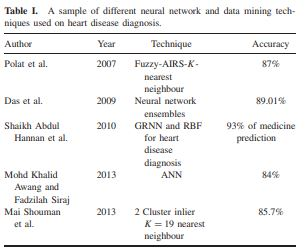

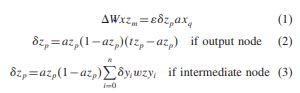

* Dimana x adalah node yang memancarkan, z adalah node penerima, y sedangkan W adalah lapisan yang mengikuti z, W adalah bobot, a untuk aktivasi, nilai delta dengan eplilon sebagai kecepatan pemelajaran.

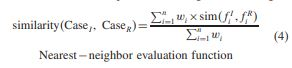

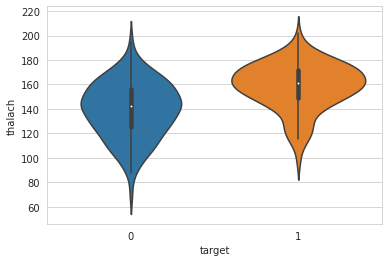

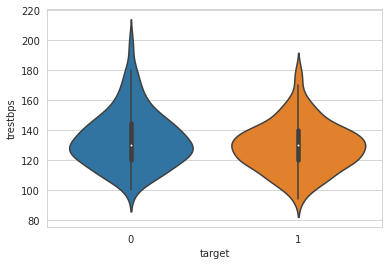

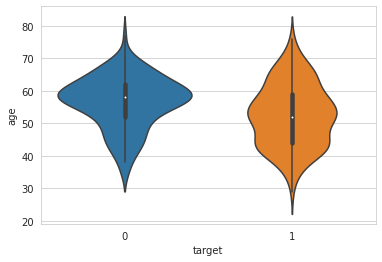

In [17]:
#Violin Plots for Axillary_Nodes
sns.violinplot(x = "target", y = "thalach", data = df, size = 8)
plt.show()

#Violin Plots for Operation_Year
sns.violinplot(x = "target", y = "trestbps", data = df, size = 8)
plt.show()

#Violin Plots for Age
sns.violinplot(x = "target", y = "age", data = df, size = 8)
plt.show()


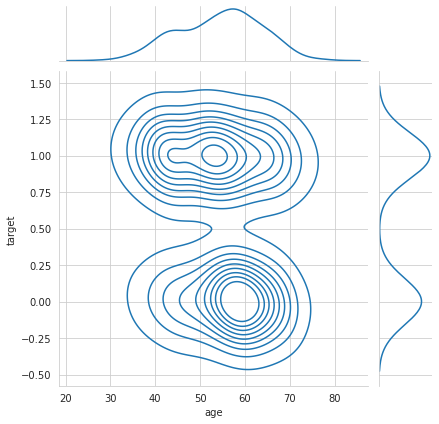

In [18]:
sns.jointplot(data=df, x="age",y="target", kind="kde")
plt.ylabel("Heart Disease")
plt.show()

* sns.jointplot merupakan perintah : menampilkan hubungan antara 2 variabel (bivariat) serta profil 1D (univariat) di margin. Plot ini adalah kelas kenyamanan yang membungkus JointGrid 
* Pada Sumbu x mendapat keterangan data berupa usia (age) dengan rentang 20 sampai dengan 80, sedangkan untuk sumbu y mendapatkan rentang nilai -0.50 sampai dengan 1.50 dengan keterangan data target.

# F. ARTIFICIAL NEURAL NETWORK

Step 2 Artificial Neural Network (ANN)

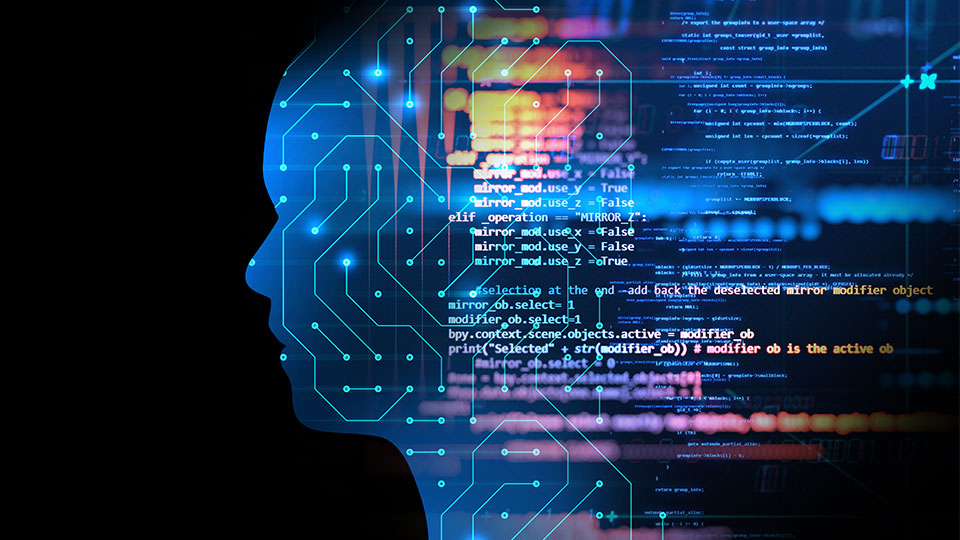

* Artificial Neural Network Artificial (ANN) atau Jaringan Syaraf Tiruan merupakan sebuah teknik atau pendekatan pengolahan informasi yang terinspirasi oleh cara kerja sistem saraf biologis, khususnya pada sel otak manusia dalam memproses informasi. Elemen kunci dari teknik ini adalah struktur sistem pengolahan informasi yang bersifat unik dan beragam untuk tiap aplikasi. Neural Network terdiri dari sejumlah besar elemen pemrosesan informasi (neuron) yang saling terhubung dan bekerja bersama-sama untuk menyelesaikan sebuah masalah tertentu, yang pada umumnya dalah masalah klasifikasi ataupun prediksi.

* Cara kerja Neural Network dapat dianalogikan sebagaiman halnya manusia belajar dengan mengunakan contoh atau yang disebut sebagai supervised learning. Sebuah Neural Network dikonfigurasi untuk aplikasi tertentu, seperti pengenalan pola atau klasifikasi data, dan kemudian disempurnakan melalui proses pembelajaran. Proses belajar yang terjadi dalam sistem biologis melibatkan penyesuaian koneksi sinaptik yang ada antara neuron, dalam halnya pada Neural Network penyesuaian koneksi sinaptik antar neuron dilakukan dengan menyesuaikan nilai bobot yang ada pada tiap konektivitas baik dari input, neuron maupun output.

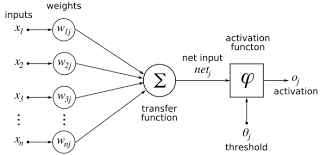

* Neural Network memproses informasi berdasarkan cara kerja otak manusia. Dalam hal ini Neural Network terdiri dari sejumlah besar elemen pemrosesan yang saling terhubung dan bekerja secara paralel untuk memecahkan suatu masalah tertentu.

* [SUMBER] https://dosen.perbanas.id/artificial-neural-network/

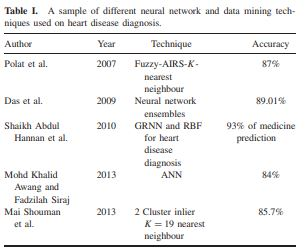

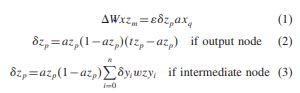

* Dimana x adalah node yang memancarkan, z adalah node penerima, y sedangkan z adalah lapisan yang mengikuti z, W adalah bobot, a untuk aktivasi, nilai delta dengan eplilon sebagai kecepatan pemelajaran.

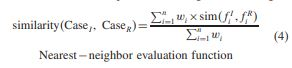

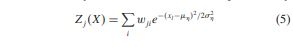

* Pada Tabel III dibawah ini, merupakan data pasien lama yang berbeda dari rumah sakit yang berbeda terutama untuk penyakit jantung bawaan dikumpulkan dan dicatat dalam database seperti (Pasien tidak, Nama Pasien, Nama Dokter, Obat yang diresepkan) diberikan. Sehingga data untuk penyakit jantung tertentu dapat diambil untuk analisis untuk meresepkan obat penyakit jantung bawaan.

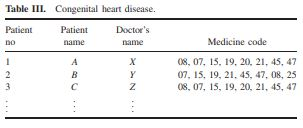

* Keuntungan lainnya dari penggunaan Neural Network termasuk:

* Pembelajaran adaptif: Kemampuan untuk belajar dalam melakukan tugas-tugas berdasarkan data yang diberikan
* Self-Organization: Sebuah Neural Network dapat membangun representasi dari informasi yang diterimanya selama proses pembelajaran secara mandiri
* Operasi Real-Time: Penghitungan Neural Network dapat dilakukan secara paralel, sehingga proses komputasi menjadi lebih cepat. Neural Network dan algoritma komputer konvensional tidaklah saling bersaing tetapi saling melengkapi. 

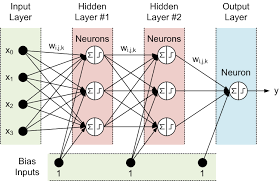

In [19]:
# Importing the dataset
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# G. SPLITING THE DATASET INTO TWO PARTS

In [22]:
X = dataset.iloc[:,0:13]
y = dataset.iloc[:,13]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

* Step 2 - Now let's make the ANN!

In [24]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Activation, Dense
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))

# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.summary()
# Fitting the ANN to the Training set
history=model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs =500,verbose=0)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 84        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


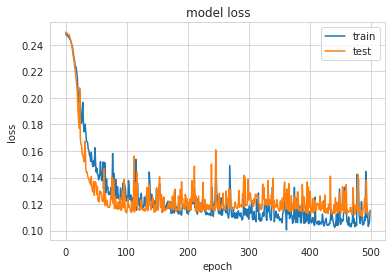

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='left')
plt.show()

# TERIMAKASIH